# Séance projet 4  : régression simple

## 1. Préparation du travail

Importons tous les modules nécessaires.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
import matplotlib.pyplot as plt 
import scipy 
import warnings
warnings.filterwarnings("ignore")

 Chargeons le jeu de données prétraité fourni à l'issue de la séance 1 qui se trouve dans le fichier `JO_clean.csv` et affichons les 5 premières lignes pour vérifier que le chargement a été effectué correctement. 
 
Pensez à télécharger au préalable le fichier `JO_clean.csv` et à le placer dans le même dossier que votre notebook.

Si vous avez importé le notebook sur Google Colab, il faut exécuter la cellule ci-dessous au préalable pour télécharger votre jeu de données dans votre environnement de travail sur Colab (inutile dans le cas où vous exécutez le notebook sur votre propre machine) :

In [2]:
!wget https://git.unistra.fr/dbernhard/isdd_data/raw/master/JO_clean.csv

dyld: Library not loaded: /usr/local/opt/gettext/lib/libintl.8.dylib
  Referenced from: /usr/local/bin/wget
  Reason: image not found


In [3]:
data = pd.read_csv('JO_clean.csv', delimiter=',')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


## 2. Etude du poids et de la taille des médaillés d'or

**Question 1:** Créez un nouveau dataframe ne contenant que les **médaillés d'or**, puis affichez le poids en fonction de la taille sous forme de nuage de points, en utilisant une couleur différente pour les sportifs masculins et les sportives féminines.

Que constatez-vous ? Comment analysez-vous les points particuliers du graphique ?

In [73]:
# Création de la dataframe

gold = data[data["Medal"]=="Gold"]

gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
65,17294,Cai Yalin,M,23.0,174.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,China
74,17299,Cai Yun,M,32.0,181.0,68.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Doubles,Gold,China
84,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China
100,18005,Cao Yuan,M,17.0,160.0,42.0,China,CHN,2012 Summer,2012,Summer,London,Diving,Diving Men's Synchronized Platform,Gold,China
101,18005,Cao Yuan,M,21.0,160.0,42.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Springboard,Gold,China


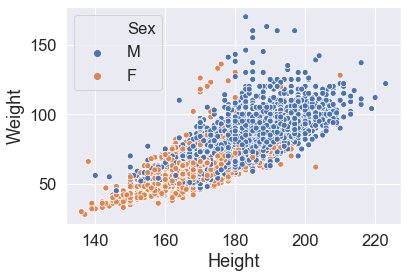

In [10]:
sns.scatterplot(x = "Height", y = "Weight", hue = "Sex", data = gold)

=======> Nous constatons que généralement, les hommes ont une taille et un poids **supérieurs** que celle des femmes. 


Cependant, il existe naturellement des exceptions (hommes de petits taille/poids ou femmes de grands tailles/poids), ce qui donne lieu à des points particuliers dans le graphique.

**Question 2 :** Déterminez les paramètres de la droite de régression linéaire pour le poids en fonction de la taille, en utilisant les données pour les médaillés d'or. Affichez ensuite les données sous forme de nuage de points, ainsi que la droite de régression, sur le même graphique. Enfin, comparez le poids prédit par le modèle pour "Laure Manaudou" et son poids réel. Que pensez-vous de ce modèle ? Comment expliquer la différence entre la valeur réelle et la valeur prédite ?

In [98]:
# Effectuer une régression linéaire simple

from sklearn.linear_model import LinearRegression

X = gold[["Height"]]

y = gold["Weight"]

model = LinearRegression(copy_X=True,fit_intercept=True, normalize=True)

model.fit(X,y)

print("Estimation : a = " + str(model.coef_[0]) + " et b = " + str(model.intercept_))

Estimation : a = 1.1059886391082094 et b = -122.72815525351686


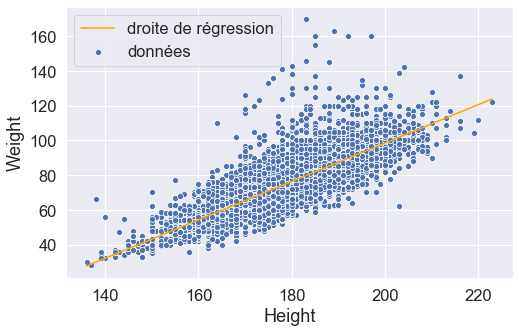

In [47]:
# Représentation graphique

plt.figure(figsize=(8,5))
sns.scatterplot(x="Height", y='Weight', data=gold)
plt.plot([np.min(X), np.max(X)], [model.intercept_ + np.min(X)*model.coef_[0], model.intercept_ + np.max(X)*model.coef_[0]], 'orange')
plt.legend([ 'droite de régression' ,'données'])
plt.show()

In [83]:
# DataFrame de Laure Manaudou

laure_manaudou = gold[gold["Name"].str.contains('Laure Manaudou')]

laure_manaudou

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
41345,74295,Laure Manaudou,F,17.0,180.0,69.0,France,FRA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Women's 400 metres Freestyle,Gold,France


In [84]:
# Prédire le poids de Laure Manadou avec le modèle

pred = model.predict(laure_manaudou[["Height"]])

print (pred)

[76.34979979]


=====> Nous remarquons que le modèle prédit 76 kg pour Laure Manadou, soit une erreur de 7 kg sur les 69 kg réels, dont une erreur d'environ 10%, ce qui pourrait être acceptable mais peut être amélioré. En effet, les tendances dépendent de nombreux facteurs (étudiés par la suite).

## 3. Etude du poids et de la taille des médaillés d'or en fonction du genre

**Question 3 :**  Déterminez cette fois-ci les paramètres pour deux droites de régression distinctes : une pour les champions  masculins et l'autre pour les championnes féminines. Affichez ensuite les données sous forme de nuage de points, ainsi que les deux droites de régression. Enfin, comparez le poids prédit par les deux modèles pour "Laure Manaudou" et son poids réel. Que pensez-vous de ces deux modèles ?

In [55]:
# Création de dataframes correspondants

male_gold = gold[gold["Sex"]=="M"]

female_gold = gold[gold["Sex"]=="F"]

X_male = male_gold[["Height"]]

y_male = male_gold["Weight"]

X_female = female_gold[["Height"]]

y_female = female_gold["Weight"]

In [56]:
# Création de deux modèles de régression linéaire par sexe

model_male = LinearRegression(copy_X=True,fit_intercept=True, normalize=True)

model_female = LinearRegression(copy_X=True,fit_intercept=True, normalize=True)

# "Fit" les modèles avec les X et y correspondants

model_male.fit(X_male,y_male)

model_female.fit(X_female,y_female)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [57]:
# Coefficients obtenus pour chacun des deux modèles

print("Estimation modèle masculin : a = " + str(model_male.coef_[0]) + " et b = " + str(model_male.intercept_))

print("Estimation modèle féminin : a = " + str(model_female.coef_[0]) + " et b = " + str(model_female.intercept_))

Estimation modèle masculin : a = 1.0534997672302566 et b = -111.83785902807003
Estimation modèle féminin : a = 0.8851319070919397 et b = -87.6671862523353


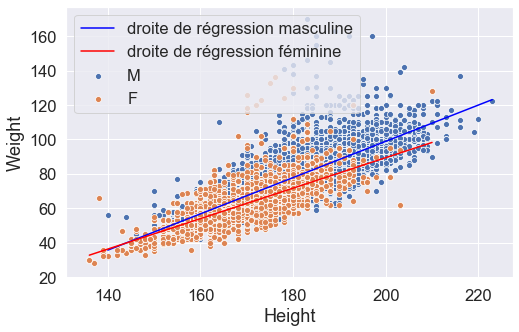

In [96]:
# Représentation graphique des résultats

plt.figure(figsize=(8,5))
sns.scatterplot(x="Height", y='Weight', data=male_gold)
sns.scatterplot(x="Height", y='Weight', data=female_gold)
plt.plot([np.min(X_male), np.max(X_male)], 
         [model_male.intercept_ + np.min(X_male)*model_male.coef_[0], 
          model_male.intercept_ + np.max(X_male)*model_male.coef_[0]], 
         'blue')
plt.plot([np.min(X_female), np.max(X_female)], 
         [model_female.intercept_ + np.min(X_female)*model_female.coef_[0], 
          model_female.intercept_ + np.max(X_female)*model_female.coef_[0]], 
         'red')
plt.legend([ 'droite de régression masculine' ,'droite de régression féminine','M','F'])
plt.show()

In [85]:
# Prédire le poids de Laure Manadou avec le modèle

pred2 = model_female.predict(laure_manaudou[["Height"]])

print (pred2)

[71.65655702]


==========> Cette fois-ci, nous remarquons que le modèle 2 prédit environ 71 kg à la place de 69kg, soit environ 4% d'erreur. Ceci montre que le fait de prendre en compte uniquement les données féminines permet de donner une meilleure prédiction au poids de Laure Manaudou.

## 4. Etude du poids et de la taille des médaillées d'or en fonction du sport

**Question 4 :** Déterminez cette fois-ci les paramètres pour deux droites de régression distinctes : une pour les femmes médaillées d'or en natation (*Swimming*) et une pour les femmes médaillées d'or en gymnastique (*Gymnastics*). Affichez ensuite les données sous forme de nuage de points et les deux droites de régression. Enfin, comparez le poids prédit par les deux modèles pour "Laure Manaudou" et son poids réel. Que pensez-vous de ces deux modèles ?

In [74]:
# Création de dataframes correspondants

female_swim = female_gold[female_gold["Sport"]=="Swimming"]

female_gym = female_gold[female_gold["Sport"]=="Gymnastics"]

X_swim = female_swim[["Height"]]

y_swim = female_swim["Weight"]

X_gym = female_gym[["Height"]]

y_gym = female_gym["Weight"]

In [75]:
# Création de deux modèles de régression linéaire par sport

model_swim = LinearRegression(copy_X=True,fit_intercept=True, normalize=True)

model_gym = LinearRegression(copy_X=True,fit_intercept=True, normalize=True)

# "Fit" les modèles avec les X et y correspondants

model_swim.fit(X_swim,y_swim)

model_gym.fit(X_gym,y_gym)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [76]:
# Coefficients obtenus pour chacun des deux modèles

print("Estimation modèle natation : a = " + str(model_swim.coef_[0]) + " et b = " + str(model_swim.intercept_))

print("Estimation modèle gymnastique : a = " + str(model_gym.coef_[0]) + " et b = " + str(model_gym.intercept_))

Estimation modèle natation : a = 0.7056985765441234 et b = -58.97390832602987
Estimation modèle gymnastique : a = 0.7640235512057034 et b = -72.11909393419234


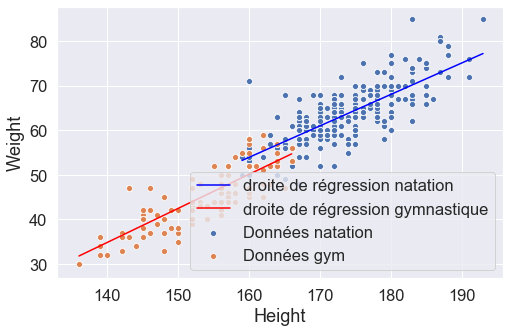

In [82]:
# Représentation graphique des résultats

plt.figure(figsize=(8,5))
sns.scatterplot(x="Height", y='Weight', data=female_swim)
sns.scatterplot(x="Height", y='Weight', data=female_gym)
plt.plot([np.min(X_swim), np.max(X_swim)], 
         [model_swim.intercept_ + np.min(X_swim)*model_swim.coef_[0], 
          model_swim.intercept_ + np.max(X_swim)*model_swim.coef_[0]], 
         'blue')
plt.plot([np.min(X_gym), np.max(X_gym)], 
         [model_gym.intercept_ + np.min(X_gym)*model_gym.coef_[0], 
          model_gym.intercept_ + np.max(X_gym)*model_gym.coef_[0]], 
         'red')
plt.legend([ 'droite de régression natation' ,'droite de régression gymnastique','Données natation','Données gym'])
plt.show()

In [88]:
# Prédire le poids de Laure Manaudou avec le modèle natation

pred_swim = model_swim.predict(laure_manaudou[["Height"]])

print (pred_swim)

[68.05183545]


=======> Le modèle natation est effectivement le plus précis pour l'instant, ce qui est attendu vu que Laure Manaudou est une nageuse (erreur de 1.4% seulement). 

En effet, on observe en général des tendances similaires dans les tailles et poids au sein du même sport. 

In [95]:
# Prédire le poids de Laure Manadou avec le modèle gymnastique

pred_gym = model_gym.predict(laure_manaudou[["Height"]])

print (pred_gym)

[65.40514528]


========> Le modèle gymnastique prédit un poids de 65 kg pour Laure Manaudou. On en déduit que si Laure Manaudou était une gymnaste, ceci serait son poids environ pour sa taille. 

En effet, on constate de ceci et de la représentation graphique précédentes que les gymnastes ont tendance à être plus petites et ont des poids inférieurs à ceux des nageuses.

## 5. Conclusion de l'analyse

**Question 5 :** Quelle conclusion générale pouvez-vous tirer des analyses précédentes ?

======> Généralement nous pouvons conclure que les tendances de poids en fonction de la taille **varient** chez les athlètes.

Grâce aux représentations graphiques et à l'exemple de Laure Manaudou, nous pouvons déduire que les tendances sont plus fortes par **discipline sportive** et par **sexe**, et que les modèles les plus précis prennent en compte les deux facteurs afin de prédire le poids en fonction de la taille.

# Commentaires libres 

Vous pouvez décrire ci-dessous tout ce que vous avez pu remarquer d’intéressant sur ce jeu de données, ou des problèmes particuliers que vous avez pu rencontrer. N’oubliez pas de commenter et décrire votre code, et de préciser les questions auxquelles il permet de répondre.